- Passos Engenharia de variáveis

-Variáveis para serem criadas:

Blocos de latitude e longitude

Charge min, max e médio

Cidade grande = True




In [74]:
!pip install -q plotly

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Acesso ao MapBox para a visualização de mapas com o plotly

In [76]:
#Mapas
import plotly.graph_objects as go
import plotly.express as px
mapbox_access_token = 'pk.eyJ1IjoiZWRpc29ubXNqIiwiYSI6ImNrcGhwaHhsaDBqcjUyb2xpaHB0czVvY3oifQ.xwV3-fok4T9Z6UI9YqUJDQ'
px.set_mapbox_access_token(mapbox_access_token)

# 1 - Carregamento das bases

In [77]:
df_charges = pd.read_csv ('/content/drive/MyDrive/Vai Academy/Case Telecom/Datasets/charge_records.csv', sep = ';', decimal = ',')
df_charges

,ActiveMonth,customerID,Charges
0,M-0,0002-ORFBO,65.7450
1,M-0,8399-YNDCH,59.8010
2,M-0,2197-OMWGI,53.5225
3,M-0,8398-TBIYD,85.5675
4,M-0,2200-DSAAL,80.6500
...,...,...,...
227985,M-9,9378-FXTIZ,67.9765
227986,M-9,4476-OSWTN,110.3715
227987,M-9,7446-KQISO,107.8450
227988,M-9,8380-MQINP,19.9255


In [78]:
df_customer = pd.read_csv('/content/drive/MyDrive/Vai Academy/Case Telecom/Datasets/customers.csv', sep = ';', decimal = ',', index_col = 'customerID')
df_customer

,gender,Country,State,City,ZipCode,LatLong,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,ChurnReason
customerID,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,United States,California,Frazier Park,93225,"34.827662, -118.999073",0,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,No,NaN
0003-MKNFE,Male,United States,California,Glendale,91206,"34.162515, -118.203869",0,No,No,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,No,NaN
0004-TLHLJ,Male,United States,California,Costa Mesa,92627,"33.645672, -117.922613",0,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,Yes,Price too high
0011-IGKFF,Male,United States,California,Martinez,94553,"38.014457, -122.115432",1,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,Product dissatisfaction
0013-EXCHZ,Female,United States,California,Camarillo,93010,"34.227846, -119.079903",1,Yes,No,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,Yes,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987-LUTYD,Female,United States,California,La Mesa,91941,"32.759327, -116.99726",0,No,No,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,No,NaN
9992-RRAMN,Male,United States,California,Riverbank,95367,"37.734971, -120.954271",0,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,Yes,Product dissatisfaction
9992-UJOEL,Male,United States,California,Elk,95432,"39.108252, -123.645121",0,No,No,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,No,NaN


#2 - Análise Exploratória

##2.1 - Análise Gráfica


Como a base contem informações geográficas é interessante fazer visualizações com mapa

In [79]:
#Formatando informações de longitude e latitude
df_customer[['Lat', 'Long']] = df_customer['LatLong'].str.split(',', expand = True)
df_customer['Lat'] = df_customer['Lat'].astype(float)
df_customer['Long'] = df_customer['Long'].astype(float)

Construindo um scatter map

In [80]:
fig = px.scatter_mapbox(df_customer, lat='Lat', lon = 'Long', color = 'Churn', zoom = 5)
fig.show()

Construindo gráfico de densidade

In [81]:
fig = px.density_mapbox(df_customer, lat = 'Lat', lon = 'Long', zoom = 5)
fig.show()

##2.2 Exploração

###2.2.1 Base customer

-Sem dados duplicados


In [82]:
df_customer

,gender,Country,State,City,ZipCode,LatLong,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,ChurnReason,Lat,Long
customerID,,,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,United States,California,Frazier Park,93225,"34.827662, -118.999073",0,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,No,NaN,34.827662,-118.999073
0003-MKNFE,Male,United States,California,Glendale,91206,"34.162515, -118.203869",0,No,No,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,No,NaN,34.162515,-118.203869
0004-TLHLJ,Male,United States,California,Costa Mesa,92627,"33.645672, -117.922613",0,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,Yes,Price too high,33.645672,-117.922613
0011-IGKFF,Male,United States,California,Martinez,94553,"38.014457, -122.115432",1,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,Product dissatisfaction,38.014457,-122.115432
0013-EXCHZ,Female,United States,California,Camarillo,93010,"34.227846, -119.079903",1,Yes,No,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,Yes,Network reliability,34.227846,-119.079903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987-LUTYD,Female,United States,California,La Mesa,91941,"32.759327, -116.99726",0,No,No,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,No,NaN,32.759327,-116.997260
9992-RRAMN,Male,United States,California,Riverbank,95367,"37.734971, -120.954271",0,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,Yes,Product dissatisfaction,37.734971,-120.954271
9992-UJOEL,Male,United States,California,Elk,95432,"39.108252, -123.645121",0,No,No,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,No,NaN,39.108252,-123.645121


In [83]:
#Sem dados duplicados 
df_customer.reset_index()[['customerID']].duplicated().sum()

0

In [84]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   Country           7043 non-null   object 
 2   State             7043 non-null   object 
 3   City              7043 non-null   object 
 4   ZipCode           7043 non-null   int64  
 5   LatLong           7043 non-null   object 
 6   SeniorCitizen     7043 non-null   int64  
 7   Partner           7043 non-null   object 
 8   Dependents        7043 non-null   object 
 9   PhoneService      7043 non-null   object 
 10  MultipleLines     7043 non-null   object 
 11  InternetService   7043 non-null   object 
 12  OnlineSecurity    7043 non-null   object 
 13  OnlineBackup      7043 non-null   object 
 14  DeviceProtection  7043 non-null   object 
 15  TechSupport       7043 non-null   object 
 16  StreamingTV       7043 non-null 

In [85]:
df_customer['City'].nunique()

1129

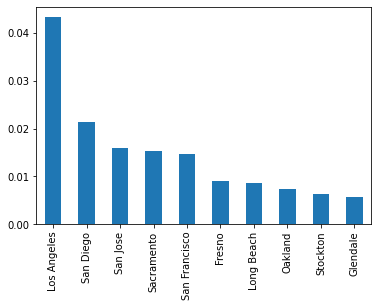

In [86]:
df_customer['City'].value_counts(normalize = True).sort_values(ascending = False).head(10).plot(kind = 'bar')

In [87]:
df_customer['Country'].nunique()

1

In [88]:
df_customer['State'].nunique()

1

###Insights 

- Existe um grande numero de cidades que podem ser classificadas em cidade grande e cidade pequena. Cidade grande seriam as 5 maiores cidades do estado

- As colunas 'Country' e 'State' pode ser eliminadas por não agregam nenhum informação nova


###2.2.2 Base charges

In [89]:
#df_charges[df_charges['customerID'] == '0011-IGKFF']

In [90]:
df_charges.customerID.nunique()

7032

### Insights

- Tornar a coluna 'ActiveMonth' em inteiro
- Criar coluna somatória, minimo e máximo da coluna 'Charges' agrupando por código de cliente

#3 - Transformações

##3.3 Agregação

###3.3.1 Criação de uma base mestre

Transformação da coluna de meses ativos

In [91]:
df_charges['ActiveMonth'] = df_charges['ActiveMonth'].str.split('-').str[1]


In [92]:
df_charges['ActiveMonth'] = df_charges['ActiveMonth'].astype(int)
df_charges[df_charges['customerID'] == '0011-IGKFF']

,ActiveMonth,customerID,Charges
6847,0,0011-IGKFF,96.5540
8756,1,0011-IGKFF,97.6385
14550,10,0011-IGKFF,95.4695
23105,11,0011-IGKFF,92.5775
24511,12,0011-IGKFF,97.2770
65032,2,0011-IGKFF,94.0235
106344,3,0011-IGKFF,95.8310
146841,4,0011-IGKFF,97.6385
175186,5,0011-IGKFF,90.0470
197294,6,0011-IGKFF,94.7465


Agrupando informações por cliente

In [93]:
df_charges_by_customer = df_charges.groupby(['customerID']).agg({'Charges':['sum', 'mean', 'max', 'min', 'std'], 'ActiveMonth': 'max'})

In [94]:
df_charges_by_customer.head()

Charges                                        ActiveMonth
                sum       mean      max      min       std         max
customerID                                                            
0002-ORFBO   593.30  65.922222  66.5860  65.6000  0.351440           8
0003-MKNFE   542.40  60.266667  61.0220  59.9000  0.331828           8
0004-TLHLJ   280.85  70.212500  73.9000  66.3775  3.170392           3
0011-IGKFF  1237.85  95.219231  97.6385  90.0470  2.175941          12
0013-EXCHZ   267.40  89.133333  92.2210  84.2140  4.306305           2

Organização do nivel das colunas

In [95]:
df_charges_by_customer.columns = ['charges_sum', 'charges_mean', 'charges_max', 'charges_min', 'charges_std', 'max_month']

In [96]:
df_charges_by_customer ['max_month'] = df_charges_by_customer['max_month'].astype(int)

Criação de colunas que auxiliem a avaliar o comportamento do clientes antes de virar churn

In [97]:
df_last_3_months = df_charges.sort_values(by='ActiveMonth', ascending = True).groupby('customerID').head(3)
df_last_3_months = df_last_3_months.drop('ActiveMonth', axis = 1).groupby('customerID').agg(['sum', 'mean', 'std'])
df_last_3_months.columns = ['last_3_months_total', 'last_3_months_mean', 'last_3_months_std']

df_last_3_months

,last_3_months_total,last_3_months_mean,last_3_months_std
customerID,,,
0002-ORFBO,197.9890,65.996333,0.512516
0003-MKNFE,181.5810,60.527000,0.465522
0004-TLHLJ,211.5225,70.507500,3.815093
0011-IGKFF,288.2160,96.072000,1.855074
0013-EXCHZ,267.4000,89.133333,4.306305
...,...,...,...
9987-LUTYD,169.3425,56.447500,0.686572
9992-RRAMN,255.5250,85.175000,0.065383
9992-UJOEL,92.7500,46.375000,4.773678


Fazer o merge com df_charges_by_customer


In [98]:
df_charge_complete = pd.merge(df_charges_by_customer, df_last_3_months, how = 'inner', on = 'customerID')

df_charge_complete

,charges_sum,charges_mean,charges_max,charges_min,charges_std,max_month,last_3_months_total,last_3_months_mean,last_3_months_std
customerID,,,,,,,,,
0002-ORFBO,593.30,65.922222,66.5860,65.6000,0.351440,8,197.9890,65.996333,0.512516
0003-MKNFE,542.40,60.266667,61.0220,59.9000,0.331828,8,181.5810,60.527000,0.465522
0004-TLHLJ,280.85,70.212500,73.9000,66.3775,3.170392,3,211.5225,70.507500,3.815093
0011-IGKFF,1237.85,95.219231,97.6385,90.0470,2.175941,12,288.2160,96.072000,1.855074
0013-EXCHZ,267.40,89.133333,92.2210,84.2140,4.306305,2,267.4000,89.133333,4.306305
...,...,...,...,...,...,...,...,...,...
9987-LUTYD,742.90,57.146154,63.9730,55.4095,2.153966,12,169.3425,56.447500,0.686572
9992-RRAMN,1873.70,85.168182,85.4150,85.1000,0.074890,21,255.5250,85.175000,0.065383
9992-UJOEL,92.75,46.375000,49.7505,42.9995,4.773678,1,92.7500,46.375000,4.773678


In [99]:
df_complete = pd.merge(df_customer, df_charge_complete, how = 'inner', on = 'customerID')
df_complete

,gender,Country,State,City,ZipCode,LatLong,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,ChurnReason,Lat,Long,charges_sum,charges_mean,charges_max,charges_min,charges_std,max_month,last_3_months_total,last_3_months_mean,last_3_months_std
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,United States,California,Frazier Park,93225,"34.827662, -118.999073",0,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,No,NaN,34.827662,-118.999073,593.30,65.922222,66.5860,65.6000,0.351440,8,197.9890,65.996333,0.512516
0003-MKNFE,Male,United States,California,Glendale,91206,"34.162515, -118.203869",0,No,No,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,No,NaN,34.162515,-118.203869,542.40,60.266667,61.0220,59.9000,0.331828,8,181.5810,60.527000,0.465522
0004-TLHLJ,Male,United States,California,Costa Mesa,92627,"33.645672, -117.922613",0,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,Yes,Price too high,33.645672,-117.922613,280.85,70.212500,73.9000,66.3775,3.170392,3,211.5225,70.507500,3.815093
0011-IGKFF,Male,United States,California,Martinez,94553,"38.014457, -122.115432",1,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,Product dissatisfaction,38.014457,-122.115432,1237.85,95.219231,97.6385,90.0470,2.175941,12,288.2160,96.072000,1.855074
0013-EXCHZ,Female,United States,California,Camarillo,93010,"34.227846, -119.079903",1,Yes,No,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,Yes,Network reliability,34.227846,-119.079903,267.40,89.133333,92.2210,84.2140,4.306305,2,267.4000,89.133333,4.306305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987-LUTYD,Female,United States,California,La Mesa,91941,"32.759327, -116.99726",0,No,No,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,No,NaN,32.759327,-116.997260,742.90,57.146154,63.9730,55.4095,2.153966,12,169.3425,56.447500,0.686572
9992-RRAMN,Male,United States,California,Riverbank,95367,"37.734971, -120.954271",0,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,Yes,Product dissatisfaction,37.734971,-120.954271,1873.70,85.168182,85.4150,85.1000,0.074890,21,255.5250,85.175000,0.065383
9992-UJOEL,Male,United States,California,Elk,95432,"39.108252, -123.645121",0,No,No,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,No,NaN,39.108252,-123.645121,92.75,46.375000,49.7505,42.9995,4.773678,1,92.7500,46.375000,4.773678


##3.4 Transformação

Drop de colunas

In [100]:
to_drop = ['ZipCode', 'Country', 'State', 'LatLong', 'ChurnReason']

df_complete = df_complete.drop(to_drop, axis = 1)

In [101]:
def null_check(df):
  nulls = df.isnull().sum()
  print (nulls[nulls>1])


In [102]:
null_check(df_complete)

charges_std          613
last_3_months_std    613
dtype: int64


Foi atribuído Nan para o desvio padrão de clientes com apenas uma observação. Os valores nulos serão substituidos por 0 

In [103]:
df_complete.loc['0021-IKXGC']
#df_customer[df_customer['customerID'] == '0021-IKXGC']

gender                           Female
City                         San Marcos
SeniorCitizen                         1
Partner                              No
Dependents                           No
PhoneService                        Yes
MultipleLines                       Yes
InternetService             Fiber optic
OnlineSecurity                       No
OnlineBackup                         No
DeviceProtection                     No
TechSupport                          No
StreamingTV                          No
StreamingMovies                      No
Contract                 Month-to-month
PaperlessBilling                    Yes
PaymentMethod          Electronic check
Churn                                No
Lat                              33.119
Long                           -117.166
charges_sum                        72.1
charges_mean                       72.1
charges_max                        72.1
charges_min                        72.1
charges_std                         NaN


In [104]:
df_complete['charges_std'].fillna(0, inplace = True)


In [105]:
df_complete['last_3_months_std'].fillna(0, inplace = True)

In [106]:
null_check(df_complete)

Series([], dtype: int64)


In [107]:
df_complete.head()

,gender,City,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Lat,Long,charges_sum,charges_mean,charges_max,charges_min,charges_std,max_month,last_3_months_total,last_3_months_mean,last_3_months_std
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,Frazier Park,0,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,No,34.827662,-118.999073,593.30,65.922222,66.5860,65.6000,0.351440,8,197.9890,65.996333,0.512516
0003-MKNFE,Male,Glendale,0,No,No,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,No,34.162515,-118.203869,542.40,60.266667,61.0220,59.9000,0.331828,8,181.5810,60.527000,0.465522
0004-TLHLJ,Male,Costa Mesa,0,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,Yes,33.645672,-117.922613,280.85,70.212500,73.9000,66.3775,3.170392,3,211.5225,70.507500,3.815093
0011-IGKFF,Male,Martinez,1,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,38.014457,-122.115432,1237.85,95.219231,97.6385,90.0470,2.175941,12,288.2160,96.072000,1.855074
0013-EXCHZ,Female,Camarillo,1,Yes,No,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,Yes,34.227846,-119.079903,267.40,89.133333,92.2210,84.2140,4.306305,2,267.4000,89.133333,4.306305


Transformar a coluna de cidade em variável discreta cidade grande ou não. Serão consideradas as 5 maiores cidades do estado da Califórnia. 

https://pt.wikipedia.org/wiki/Lista_de_cidades_da_Calif%C3%B3rnia

In [108]:
df_transf = df_complete



In [109]:
big_city = ['Los Angeles', 'San Diego', 'São José', 'São Francisco', 'Fresno']

a = df_transf[['City']].isin(big_city)

a = pd.get_dummies(a['City'], drop_first=True)

df_transf['big_city'] = a.iloc[:, 0]

df_transf = df_transf.drop(['City'], axis = 1)

df_transf

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Lat,Long,charges_sum,charges_mean,charges_max,charges_min,charges_std,max_month,last_3_months_total,last_3_months_mean,last_3_months_std,big_city
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,0,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,No,34.827662,-118.999073,593.30,65.922222,66.5860,65.6000,0.351440,8,197.9890,65.996333,0.512516,0
0003-MKNFE,Male,0,No,No,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,No,34.162515,-118.203869,542.40,60.266667,61.0220,59.9000,0.331828,8,181.5810,60.527000,0.465522,0
0004-TLHLJ,Male,0,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,Yes,33.645672,-117.922613,280.85,70.212500,73.9000,66.3775,3.170392,3,211.5225,70.507500,3.815093,0
0011-IGKFF,Male,1,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,38.014457,-122.115432,1237.85,95.219231,97.6385,90.0470,2.175941,12,288.2160,96.072000,1.855074,0
0013-EXCHZ,Female,1,Yes,No,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,Yes,34.227846,-119.079903,267.40,89.133333,92.2210,84.2140,4.306305,2,267.4000,89.133333,4.306305,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987-LUTYD,Female,0,No,No,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,No,32.759327,-116.997260,742.90,57.146154,63.9730,55.4095,2.153966,12,169.3425,56.447500,0.686572,0
9992-RRAMN,Male,0,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,Yes,37.734971,-120.954271,1873.70,85.168182,85.4150,85.1000,0.074890,21,255.5250,85.175000,0.065383,0
9992-UJOEL,Male,0,No,No,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,No,39.108252,-123.645121,92.75,46.375000,49.7505,42.9995,4.773678,1,92.7500,46.375000,4.773678,0


In [252]:
import regex as re

a = pd.get_dummies(df_transf, drop_first= False)

a.head()





,SeniorCitizen,Lat,Long,charges_sum,charges_mean,charges_max,charges_min,charges_std,max_month,last_3_months_total,last_3_months_mean,last_3_months_std,big_city,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,34.827662,-118.999073,593.30,65.922222,66.5860,65.6000,0.351440,8,197.9890,65.996333,0.512516,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,1,0
0003-MKNFE,0,34.162515,-118.203869,542.40,60.266667,61.0220,59.9000,0.331828,8,181.5810,60.527000,0.465522,0,0,1,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0
0004-TLHLJ,0,33.645672,-117.922613,280.85,70.212500,73.9000,66.3775,3.170392,3,211.5225,70.507500,3.815093,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
0011-IGKFF,1,38.014457,-122.115432,1237.85,95.219231,97.6385,90.0470,2.175941,12,288.2160,96.072000,1.855074,0,0,1,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1
0013-EXCHZ,1,34.227846,-119.079903,267.40,89.133333,92.2210,84.2140,4.306305,2,267.4000,89.133333,4.306305,0,1,0,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1


In [253]:
a.columns = [col.replace("_Yes", "") for col in a.columns]
a.head()

,SeniorCitizen,Lat,Long,charges_sum,charges_mean,charges_max,charges_min,charges_std,max_month,last_3_months_total,last_3_months_mean,last_3_months_std,big_city,gender_Female,gender_Male,Partner_No,Partner,Dependents_No,Dependents,PhoneService_No,PhoneService,MultipleLines_No,MultipleLines_No phone service,MultipleLines,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection,TechSupport_No,TechSupport_No internet service,TechSupport,StreamingTV_No,StreamingTV_No internet service,StreamingTV,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,34.827662,-118.999073,593.30,65.922222,66.5860,65.6000,0.351440,8,197.9890,65.996333,0.512516,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,1,0
0003-MKNFE,0,34.162515,-118.203869,542.40,60.266667,61.0220,59.9000,0.331828,8,181.5810,60.527000,0.465522,0,0,1,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0
0004-TLHLJ,0,33.645672,-117.922613,280.85,70.212500,73.9000,66.3775,3.170392,3,211.5225,70.507500,3.815093,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
0011-IGKFF,1,38.014457,-122.115432,1237.85,95.219231,97.6385,90.0470,2.175941,12,288.2160,96.072000,1.855074,0,0,1,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1
0013-EXCHZ,1,34.227846,-119.079903,267.40,89.133333,92.2210,84.2140,4.306305,2,267.4000,89.133333,4.306305,0,1,0,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1


In [254]:
#Algumas colunas apresentam informações que podem ser condensadas.
#Por exemplo: As informações de MultipleLines_No e MultipleLines_No phone service são pessoas sem multiplas linhas que podem ser explicadas só pela coluna Multiplelines

to_drop = ['gender_Male', 'Partner_No', 'Dependents_No', 'PhoneService_No', 'PaperlessBilling_No', 'Churn_No', 
           'MultipleLines_No', 'MultipleLines_No phone service','OnlineSecurity_No', 'OnlineSecurity_No internet service',
           'OnlineBackup_No','OnlineBackup_No internet service','DeviceProtection_No', 'DeviceProtection_No internet service',
           'TechSupport_No', 'TechSupport_No internet service', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingMovies_No',
           'StreamingMovies_No internet service', 'PaperlessBilling_No', 'Lat', 'Long' ]

a = a.drop(to_drop, axis = 1)

In [255]:
#Outras colunas podem ser agrupadas
#Por exemplo: InternetService_DSL	InternetService_Fiber optic pode ser substituido por internet Yes

a['InternetService'] = a['InternetService_DSL'] + a['InternetService_Fiber optic']
a = a.drop(['InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No'], axis = 1)


In [256]:
#Métodos de pagamento podem ser agrupados em automatico ou não
a['PaymentMethod_automatic'] = a['PaymentMethod_Bank transfer (automatic)'] + a['PaymentMethod_Credit card (automatic)']
a = a.drop(['PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)' ], axis = 1)

In [258]:
a

,SeniorCitizen,charges_sum,charges_mean,charges_max,charges_min,charges_std,max_month,last_3_months_total,last_3_months_mean,last_3_months_std,big_city,gender_Female,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling,Churn,InternetService,PaymentMethod_automatic
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,593.30,65.922222,66.5860,65.6000,0.351440,8,197.9890,65.996333,0.512516,0,1,1,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0
0003-MKNFE,0,542.40,60.266667,61.0220,59.9000,0.331828,8,181.5810,60.527000,0.465522,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0
0004-TLHLJ,0,280.85,70.212500,73.9000,66.3775,3.170392,3,211.5225,70.507500,3.815093,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0
0011-IGKFF,1,1237.85,95.219231,97.6385,90.0470,2.175941,12,288.2160,96.072000,1.855074,0,0,1,0,1,0,0,1,1,0,1,1,1,0,0,1,1,1,0
0013-EXCHZ,1,267.40,89.133333,92.2210,84.2140,4.306305,2,267.4000,89.133333,4.306305,0,1,1,0,1,0,0,0,0,1,1,0,1,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987-LUTYD,0,742.90,57.146154,63.9730,55.4095,2.153966,12,169.3425,56.447500,0.686572,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0
9992-RRAMN,0,1873.70,85.168182,85.4150,85.1000,0.074890,21,255.5250,85.175000,0.065383,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,1,1,1,0
9992-UJOEL,0,92.75,46.375000,49.7505,42.9995,4.773678,1,92.7500,46.375000,4.773678,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0


###3.4.3 Redimensionamento de variáveis

A diferença de magnitude entre varáveis impacta negativamento alguns modelos que têm como premissa dados centralizados em zero. Portanto, para essa etapa, serão seguidos os seguintes passos:

1- Verificação de outliers

2- Teste de shapiro para avaliar quais variáveis possuem distribuição normal





In [261]:
df_clean = a
df_cont = df_clean.iloc[:, 1:10]


In [262]:
df_cont

,charges_sum,charges_mean,charges_max,charges_min,charges_std,max_month,last_3_months_total,last_3_months_mean,last_3_months_std
customerID,,,,,,,,,
0002-ORFBO,593.30,65.922222,66.5860,65.6000,0.351440,8,197.9890,65.996333,0.512516
0003-MKNFE,542.40,60.266667,61.0220,59.9000,0.331828,8,181.5810,60.527000,0.465522
0004-TLHLJ,280.85,70.212500,73.9000,66.3775,3.170392,3,211.5225,70.507500,3.815093
0011-IGKFF,1237.85,95.219231,97.6385,90.0470,2.175941,12,288.2160,96.072000,1.855074
0013-EXCHZ,267.40,89.133333,92.2210,84.2140,4.306305,2,267.4000,89.133333,4.306305
...,...,...,...,...,...,...,...,...,...
9987-LUTYD,742.90,57.146154,63.9730,55.4095,2.153966,12,169.3425,56.447500,0.686572
9992-RRAMN,1873.70,85.168182,85.4150,85.1000,0.074890,21,255.5250,85.175000,0.065383
9992-UJOEL,92.75,46.375000,49.7505,42.9995,4.773678,1,92.7500,46.375000,4.773678


charges_sum               AxesSubplot(0.125,0.125;0.0731132x0.755)
charges_mean           AxesSubplot(0.212736,0.125;0.0731132x0.755)
charges_max            AxesSubplot(0.300472,0.125;0.0731132x0.755)
charges_min            AxesSubplot(0.388208,0.125;0.0731132x0.755)
charges_std            AxesSubplot(0.475943,0.125;0.0731132x0.755)
max_month              AxesSubplot(0.563679,0.125;0.0731132x0.755)
last_3_months_total    AxesSubplot(0.651415,0.125;0.0731132x0.755)
last_3_months_mean     AxesSubplot(0.739151,0.125;0.0731132x0.755)
last_3_months_std      AxesSubplot(0.826887,0.125;0.0731132x0.755)
dtype: object

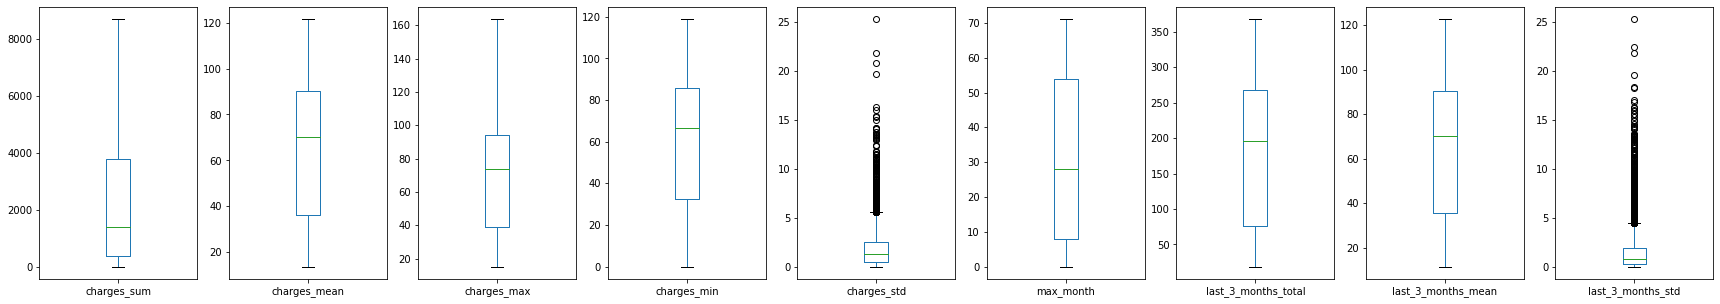

In [263]:
df_cont.plot(kind = 'box', figsize = (30, 5), subplots = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7fd4328d0>,
      dtype=object)

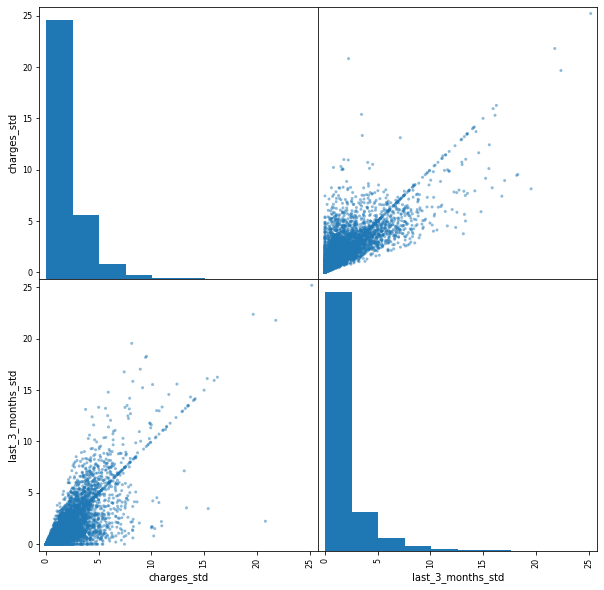

In [264]:
#Avaliação das colunas charges_std e last_3_months_std
df_std = df_cont[['charges_std','last_3_months_std']]
pd.plotting.scatter_matrix(df_std, figsize=(10,10))


In [265]:
df_cont = df_cont.drop(df_std, axis = 1)


In [266]:
df_cont

,charges_sum,charges_mean,charges_max,charges_min,max_month,last_3_months_total,last_3_months_mean
customerID,,,,,,,
0002-ORFBO,593.30,65.922222,66.5860,65.6000,8,197.9890,65.996333
0003-MKNFE,542.40,60.266667,61.0220,59.9000,8,181.5810,60.527000
0004-TLHLJ,280.85,70.212500,73.9000,66.3775,3,211.5225,70.507500
0011-IGKFF,1237.85,95.219231,97.6385,90.0470,12,288.2160,96.072000
0013-EXCHZ,267.40,89.133333,92.2210,84.2140,2,267.4000,89.133333
...,...,...,...,...,...,...,...
9987-LUTYD,742.90,57.146154,63.9730,55.4095,12,169.3425,56.447500
9992-RRAMN,1873.70,85.168182,85.4150,85.1000,21,255.5250,85.175000
9992-UJOEL,92.75,46.375000,49.7505,42.9995,1,92.7500,46.375000


In [267]:
df_clean = df_clean.drop(df_std, axis = 1)

In [268]:
df_clean

,SeniorCitizen,charges_sum,charges_mean,charges_max,charges_min,max_month,last_3_months_total,last_3_months_mean,big_city,gender_Female,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling,Churn,InternetService,PaymentMethod_automatic
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,593.30,65.922222,66.5860,65.6000,8,197.9890,65.996333,0,1,1,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0
0003-MKNFE,0,542.40,60.266667,61.0220,59.9000,8,181.5810,60.527000,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0
0004-TLHLJ,0,280.85,70.212500,73.9000,66.3775,3,211.5225,70.507500,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0
0011-IGKFF,1,1237.85,95.219231,97.6385,90.0470,12,288.2160,96.072000,0,0,1,0,1,0,0,1,1,0,1,1,1,0,0,1,1,1,0
0013-EXCHZ,1,267.40,89.133333,92.2210,84.2140,2,267.4000,89.133333,0,1,1,0,1,0,0,0,0,1,1,0,1,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987-LUTYD,0,742.90,57.146154,63.9730,55.4095,12,169.3425,56.447500,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0
9992-RRAMN,0,1873.70,85.168182,85.4150,85.1000,21,255.5250,85.175000,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,1,1,1,0
9992-UJOEL,0,92.75,46.375000,49.7505,42.9995,1,92.7500,46.375000,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7f05027d0>,
      dtype=object)

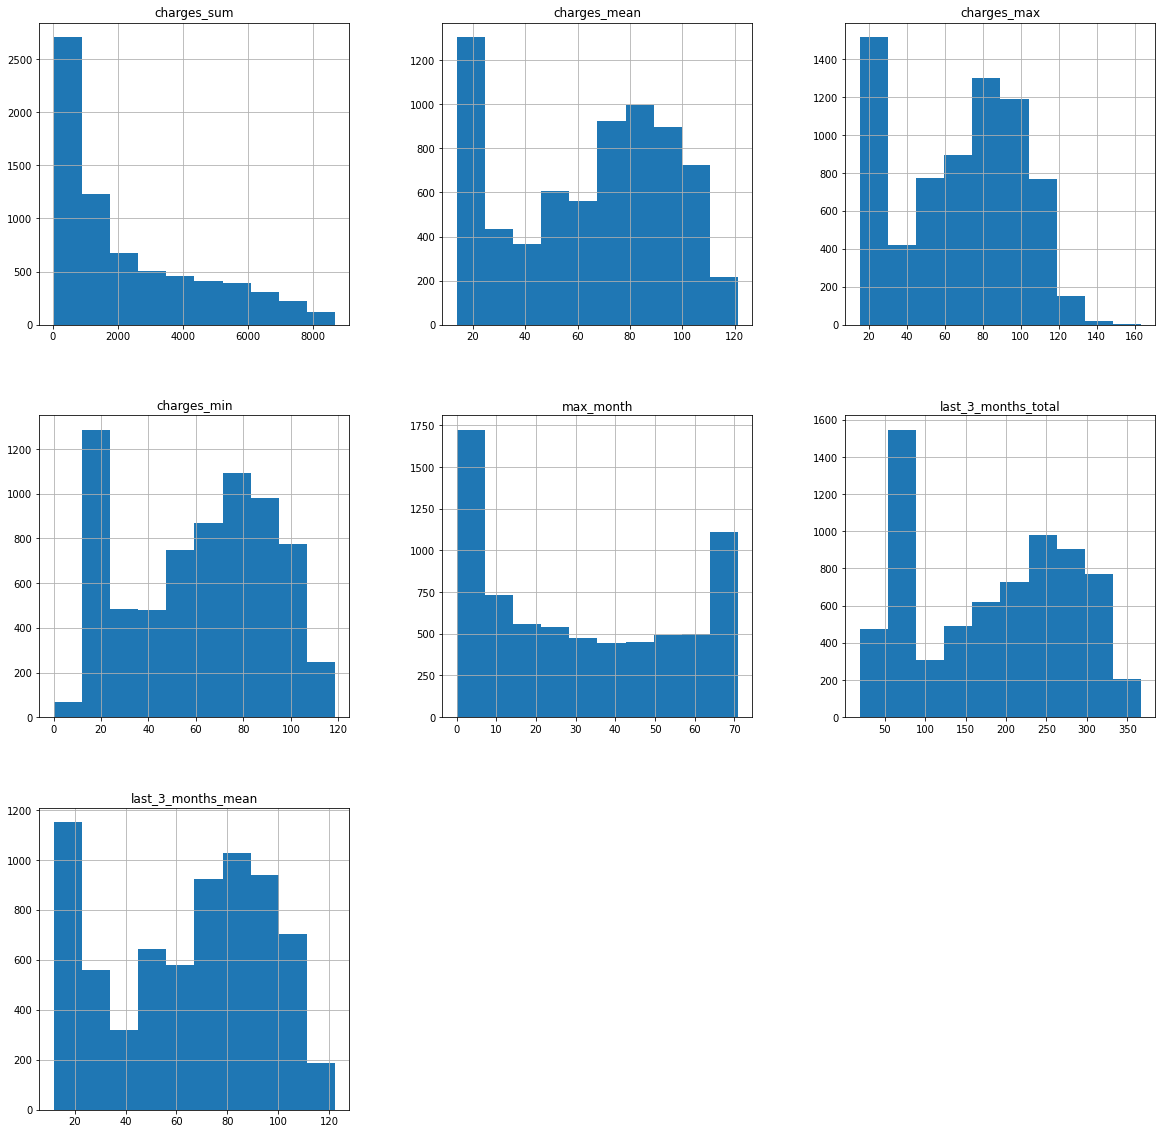

In [269]:
df_cont.hist(figsize=(20,20))

In [270]:
from scipy.stats import shapiro

for column in df_cont.columns:
    print("O teste de Shapiro para {} é: {}".format(column, shapiro(df_cont[column].sample(5000))))

O teste de Shapiro para charges_sum é: (0.8616453409194946, 0.0)
O teste de Shapiro para charges_mean é: (0.9264753460884094, 3.5032461608120427e-44)
O teste de Shapiro para charges_max é: (0.9408549666404724, 8.766102803276758e-41)
O teste de Shapiro para charges_min é: (0.9399399757385254, 5.106471733846066e-41)
O teste de Shapiro para max_month é: (0.9054783582687378, 0.0)
O teste de Shapiro para last_3_months_total é: (0.9281308650970459, 8.127531093083939e-44)
O teste de Shapiro para last_3_months_mean é: (0.9281553626060486, 8.267660939516421e-44)


### Insights

- As colunas que contêm dados de desvio padrão prossuem uma grande quantidade de outliers. Isso provavelmente se dá pela variação de perfil de cliente. Existem os clientes antigos e que foram adiquirindo novos serviços, clientes novos que pagam a mesma coisa todo mes, clientes de 1 mês. Portanto, as colunas de desvio padrão serão removidas

- Nenhuma das colunas aparenta ter dados com distribuição normal e essa hipótese foi confirmada com o teste de shapiro

- Normalização dos dados com boxcox

In [277]:
b = df_cont

b
for column in b.columns:
  box_values = boxcox(b.column, alpha=0.05)
  b[column + '_norm'] = box_values [0]


AttributeError: ignored

In [276]:
b

,charges_sum,charges_mean,charges_max,charges_min,max_month,last_3_months_total,last_3_months_mean
customerID,,,,,,,
0002-ORFBO,593.30,65.922222,66.5860,65.6000,8,197.9890,65.996333
0003-MKNFE,542.40,60.266667,61.0220,59.9000,8,181.5810,60.527000
0004-TLHLJ,280.85,70.212500,73.9000,66.3775,3,211.5225,70.507500
0011-IGKFF,1237.85,95.219231,97.6385,90.0470,12,288.2160,96.072000
0013-EXCHZ,267.40,89.133333,92.2210,84.2140,2,267.4000,89.133333
...,...,...,...,...,...,...,...
9987-LUTYD,742.90,57.146154,63.9730,55.4095,12,169.3425,56.447500
9992-RRAMN,1873.70,85.168182,85.4150,85.1000,21,255.5250,85.175000
9992-UJOEL,92.75,46.375000,49.7505,42.9995,1,92.7500,46.375000


In [278]:
#Função para normalizar as colunas
def box_norm(df):
  for column in df.columns:
    box_values = boxcox(df.column, alpha=0.05)
    df[column + '_norm'] = box_values [0]
  return df

box_norm(df_cont)


AttributeError: ignored

In [251]:

df_clean.head()

0    [(charges_max_norm, charges_mean_norm), (charg...
1                 {charges_max_norm, charges_min_norm}
dtype: object

In [246]:
df_clean

0    [(charges_max_norm, charges_mean_norm), (charg...
1                 {charges_max_norm, charges_min_norm}
dtype: object

In [179]:
#Coluna final
df_select = pd.merge(df_clean, df_cont, how = 'inner', on = ('charges_sum', 'charges_mean', 'charges_max', 'charges_min', 'last_3_months_total', 'last_3_months_mean', 'max_month' ))
to_drop = ['charges_sum', 'charges_mean', 'charges_max', 'charges_min', 'last_3_months_total', 'last_3_months_mean' ]
df_select = df_select.drop(to_drop, axis = 1)

In [243]:
df_select

,SeniorCitizen,max_month,big_city,gender_Female,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling,Churn,InternetService,PaymentMethod_automatic,charges_sum_norm,charges_mean_norm,charges_max_norm,charges_min_norm
0,0,8,0,1,1,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,16.045504,48.704342,43.151237,41.586945
1,0,8,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,15.594319,44.797782,39.913670,38.364721
2,0,3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0,12.580953,51.647788,47.354186,42.023406
3,1,12,0,0,1,0,1,0,0,1,1,0,1,1,1,0,0,1,1,1,0,20.160739,68.514307,60.650383,55.010876
4,1,2,0,1,1,0,1,0,0,0,0,1,1,0,1,0,0,1,1,1,0,12.375868,64.450433,57.657199,51.859391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8109,0,12,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,17.222964,42.628426,41.635369,35.796466
8110,0,21,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,1,1,1,0,22.843629,61.789433,53.864052,52.339974
8111,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,8.521758,35.054505,33.231603,28.539328
8112,0,66,0,0,1,1,1,0,1,0,1,1,0,1,0,0,1,0,0,1,0,29.777552,50.865150,48.562084,42.848095


#4 - Seleção de variáveis

In [163]:
from sklearn import metrics
from sklearn.feature_selection import VarianceThreshold

##4.1 Por correlação

Retirada de colunas que estão correlacionadas para redução de complexidade dos modelos

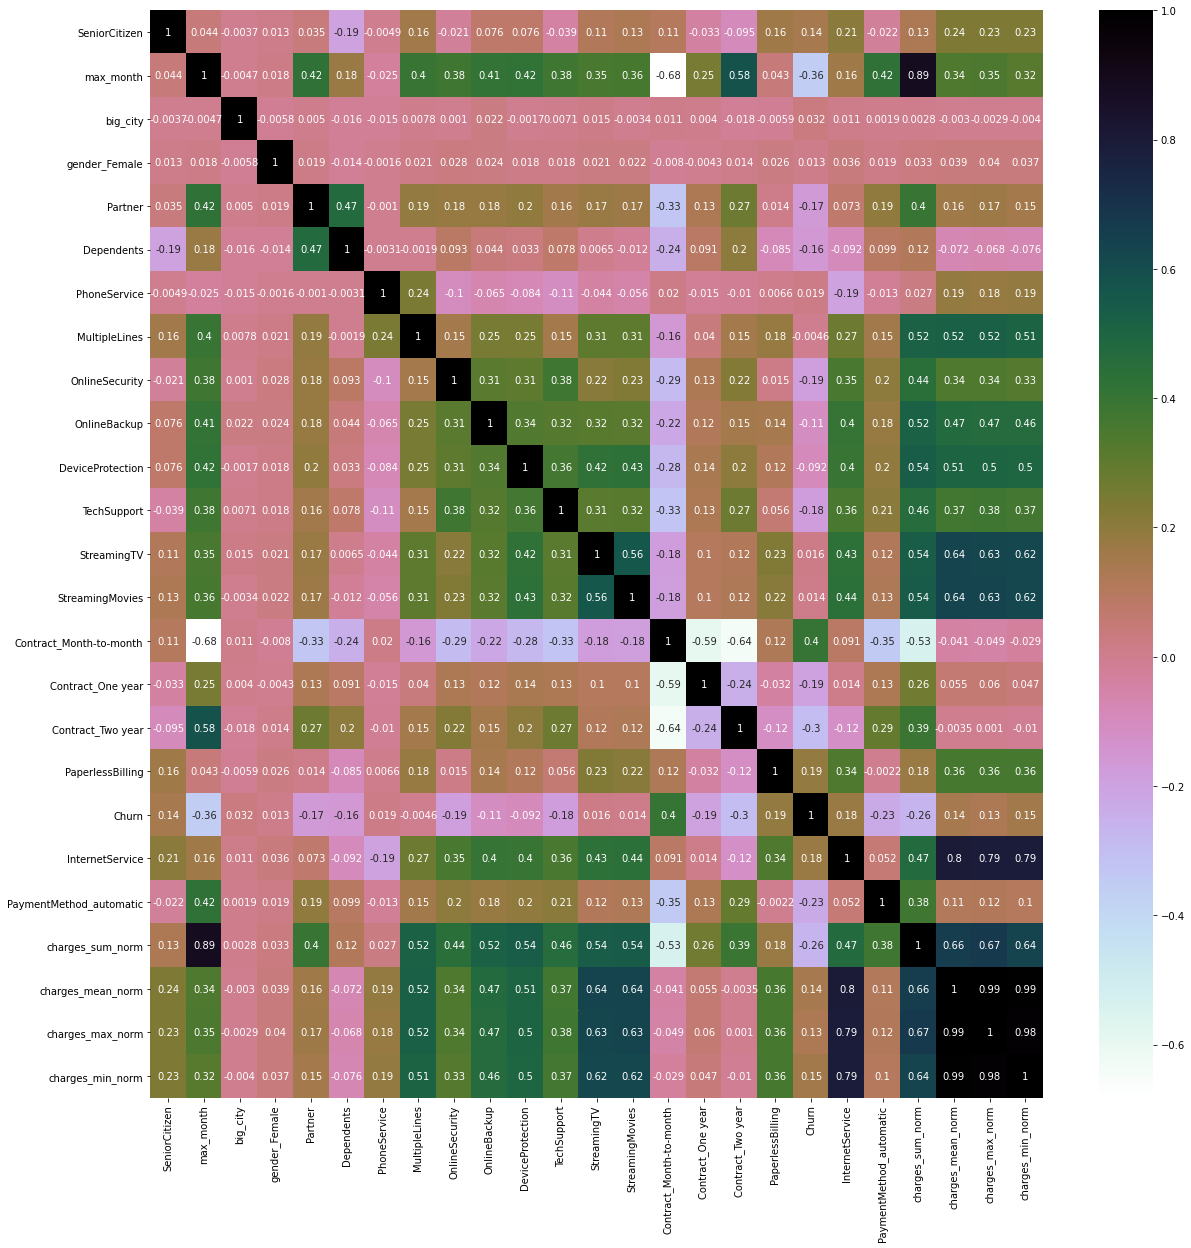

In [221]:
plt.figure(figsize = (20,20))



sns.heatmap(df_select.corr(), annot= True, cmap = 'cubehelix_r')
plt.show()

In [209]:
def get_correlated_features(df, threshold = 0.9):
    correlated_features = []
    features_to_remove = set()
    
    correlation_matrix = df.corr()
    
    for i in range(len(correlation_matrix .columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                colname = correlation_matrix.columns[i]
                
                correlated_features.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))
                
                features_to_remove.add(colname)
    
    return correlated_features, features_to_remove

In [219]:
correlated_cols = get_correlated_features(df_select)

df_selected = df_select.drop(correlated_cols[1], axis = 1)
df_selected

,SeniorCitizen,max_month,big_city,gender_Female,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling,Churn,InternetService,PaymentMethod_automatic,charges_sum_norm,charges_mean_norm
0,0,8,0,1,1,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,16.045504,48.704342
1,0,8,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,15.594319,44.797782
2,0,3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0,12.580953,51.647788
3,1,12,0,0,1,0,1,0,0,1,1,0,1,1,1,0,0,1,1,1,0,20.160739,68.514307
4,1,2,0,1,1,0,1,0,0,0,0,1,1,0,1,0,0,1,1,1,0,12.375868,64.450433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8109,0,12,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,17.222964,42.628426
8110,0,21,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,1,1,1,0,22.843629,61.789433
8111,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,8.521758,35.054505
8112,0,66,0,0,1,1,1,0,1,0,1,1,0,1,0,0,1,0,0,1,0,29.777552,50.865150


### Insights

É importante se atentar com a diferença entre correlação e causalidade. Para verificar se uma correlação tem causalidade é necessário olhar mais a fundo para os dados. Porém, a identificação de correlações de causalidade pode nos dar caminhos e/ou insight de um bom caminho para seguir. Portanto, a partir do gráfico acima, pode-se observar:

- Quanto maior a duração do contrato, menor a probabilidade de churn
  - Promover benefícios para incentivar clientes a fechar contrato longo;
  - Criar um produto/pacote envolvendo serviços de segurança, pacote técnico, com contrato de dois anois voltado para pessoas casadas e com filhos. 

- Métodos de pagamento automáticos diminui a probabilidade de churn
  - Incentivar e criar novas ferramentas para método de pagamento automático
  -Identificar o tipo de consumidos e criar um produto/pacote envolvendo serviços de segurança, pacote técnico, com contrato de dois anois para pessoas casada. 





##4.2 Por variância

Exclusão de variáveis que não variam muito no conjunto de dados. Isso não significa que ela não esteja correlacionada com a variável resposta, portanto se trata de uma simplificação que pode causar impacto

In [223]:
def bool_col(df):
    bool_cols = df.isin([0,1]).all()
    return list(bool_cols[bool_cols].index)

In [225]:
bool_cols = bool_col(df_selected)
bool_cols

['SeniorCitizen',
 'big_city',
 'gender_Female',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling',
 'Churn',
 'InternetService',
 'PaymentMethod_automatic']

In [279]:
select_bool = df_selected[bool_cols]
select_bool

KeyError: ignored

In [230]:
from sklearn.feature_selection import VarianceThreshold
p = .8
sel = VarianceThreshold(threshold=(p*(1-p)))
sel.fit_transform(select_bool)




array([[1, 1, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 1, 0]])

In [233]:
variance_removed = set(select_bool.columns[~sel.get_support()])
variance_removed

{'Contract_One year', 'PhoneService', 'SeniorCitizen', 'big_city'}

In [234]:
df_selected = df_select.drop(variance_removed, axis = 1)

In [236]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8114 entries, 0 to 8113
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   max_month                8114 non-null   int64  
 1   gender_Female            8114 non-null   uint8  
 2   Partner                  8114 non-null   uint8  
 3   Dependents               8114 non-null   uint8  
 4   MultipleLines            8114 non-null   uint8  
 5   OnlineSecurity           8114 non-null   uint8  
 6   OnlineBackup             8114 non-null   uint8  
 7   DeviceProtection         8114 non-null   uint8  
 8   TechSupport              8114 non-null   uint8  
 9   StreamingTV              8114 non-null   uint8  
 10  StreamingMovies          8114 non-null   uint8  
 11  Contract_Month-to-month  8114 non-null   uint8  
 12  Contract_Two year        8114 non-null   uint8  
 13  PaperlessBilling         8114 non-null   uint8  
 14  Churn                   

#5 - Modelagem

In [280]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, plot_confusion_matrix, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [281]:
X = df_selected.drop(columns=['Churn'], axis=1)
y = df_selected['Churn']

In [284]:
#Checando se não tem nenhum valor nulo

null_cols = X.isnull().sum()>1
null_cols[null_cols]

Series([], dtype: bool)

In [285]:
def plot_feature_importances(model, X, feature_importances):
    df_importance = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
    df_importance = df_importance.set_index('Feature')

    ax = df_importance.sort_values(by='Importance', ascending = False).head(10).plot.barh(figsize=(5, 5))
    ax.invert_yaxis()

In [286]:
def plot_roc_curve(model, X_val, y_val, ax = None):
    roc_auc = roc_auc_score(y_val, model.predict(X_val))
    fpr, tpr, thresholds = roc_curve(y_val, model.predict_proba(X_val)[:,1])
    
    if ax is not None:
        ax.plot(fpr, tpr, label='AUC = %0.2f)' % roc_auc)
        ax.plot([0, 1], [0, 1],'r--')
        ax.set_xlabel('Taxa de Falsos Positivos')
        ax.set_ylabel('Taxa de Verdadeiros Positivos')
        ax.legend(loc="lower right")
    else:
        plt.figure()
        plt.plot(fpr, tpr, label='AUC = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlabel('Taxa de Falsos Positivos')
        plt.ylabel('Taxa de Verdadeiros Positivos')
        plt.title('Curva ROC')
        plt.legend(loc="lower right")
        plt.show()

##5.1 - Divisão da base em treino, teste e validação

In [289]:
from sklearn.model_selection import train_test_split
seed = 13

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, stratify = y , random_state = seed)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .25, stratify = y_train, random_state = seed)

##5.2 Arvore de decisão

1. Parâmetros: 

**max_depth**: Quantidade máxima de níveis que a arvore terá

**min_samples_split**: Quantidade mínima de amostra que um nó deve ter para se dividir mais uma vez

**min_samples_leaf**: QUantidade minima de amostras que uma folha pode ter

2. CrossValidation

O Crossvalidation pega diferentes blocos do dataset para utilizar como teste. Dessa forma, o bloco que tiver melhor resultado no dataset de treino é escolhido. 

3. 
GridSearch

A escolha do melhor conjunto de hiperparâmentro foi feita baseado na curva ROC AUC. Escolheu-se esse método pois otimiza verdadeiros positivo e minimiza falso positivo. Essa estratégia foi adotada considerando que o objetivo do modelo é fazer campanhas de retenção mais assertivas, ou seja, atingir cliente que vão se tornar churn. 

In [308]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [298]:
#Definindo possíveis valores de hiperparâmetros para ser explorado

params = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
          'min_samples_split':[2, 3, 4, 5, 6],
          'min_samples_leaf':[1, 2, 3]
          }


#Criação do objeto decision tree classifier
tree = DecisionTreeClassifier(random_state= seed)

#Criação do objeto Kfold com StratifiedKfold para validação cruzada
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state= seed)

#Criação de objeto de busca dos melhores parâmetros com GridSearch
grid_search = GridSearchCV(tree, param_grid = params, scoring = 'roc_auc', cv = skf.split(X_train, y_train))

#Treino do modelo com grid search

grid_search.fit(X_train, y_train)
print('Melhores hiperparâmetros')
print(grid_search.best_params_)

#Criação do modelo com as melhores combinações de hiperparâmetros

tree = DecisionTreeClassifier(random_state= seed, max_depth = grid_search.best_params_['max_depth'],
                              min_samples_split = grid_search.best_params_['min_samples_split'],
                              min_samples_leaf = grid_search.best_params_['min_samples_leaf']
                              )

#Treino do do modelo
tree.fit(X_train, y_train)

#Validação
y_pred_tree = tree.predict(X_val)

Melhores hiperparâmetros
{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}


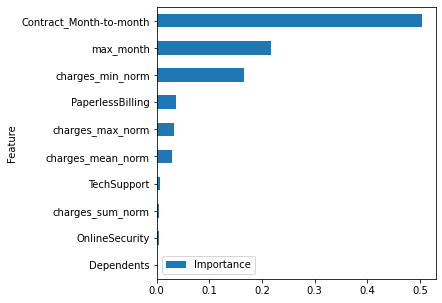

In [299]:
plot_feature_importances(tree, X, tree.feature_importances_)

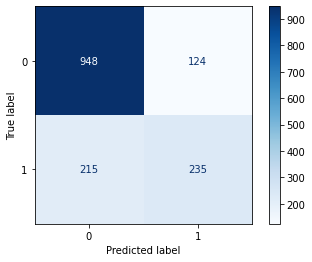

In [301]:
plot_confusion_matrix(tree, X_val, y_val, cmap=plt.cm.Blues, values_format='')

In [312]:
print("Acurácia Treino: {:.2f}".format(tree.score(X_train, y_train)))
print("Acurácia Validação: {:.2f}\n".format(tree.score(X_val, y_val)))
print(classification_report(y_val, y_pred_tree))
print("Área sob a curva ROC: {:.2f}".format(roc_auc_score(y_val, y_pred_tree)))

Acurácia Treino: 0.79
Acurácia Validação: 0.78

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1072
           1       0.65      0.52      0.58       450

    accuracy                           0.78      1522
   macro avg       0.73      0.70      0.71      1522
weighted avg       0.77      0.78      0.77      1522

Área sob a curva ROC: 0.70


##5.3 Regressão Logística

In [316]:
from sklearn.linear_model import LogisticRegression

In [318]:
# Parametros para o grid search
params = {"C": np.arange(1, 150, 5)}

# Criar objeto com o LogisticRegression
logreg = LogisticRegression(solver='liblinear')

# Criar objeto KFold com StratifiedKFold para validação cruzada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

# Criar um objeto de grade de busca com GridSearchCV
grid_search = GridSearchCV(logreg, param_grid=params, scoring='roc_auc',
                           cv=skf.split(X_train, y_train))

# Treinar o modelo com o grid search
grid_search.fit(X_train, y_train)
print('Melhores hiperparâmetros:')
print(grid_search.best_params_)


#Criação do modelo com as melhores combinações de hiperparâmetros

logreg = LogisticRegression(solver='liblinear', C = grid_search.best_params_['C'])
# Fita o modelo com o dataset de treino
logreg.fit(X_train, y_train)

# Usa o modelo para prever o conjunto de validação
y_pred_logreg = logreg.predict(X_val)

Melhores hiperparâmetros:
{'C': 1}


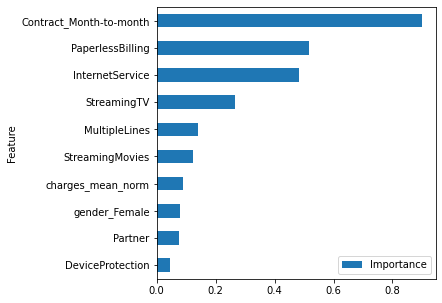

In [319]:
plot_feature_importances(tree, X, logreg.coef_[0])

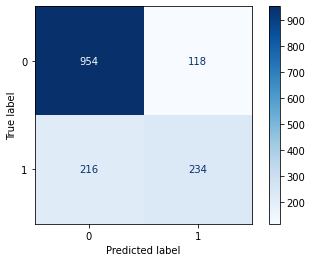

In [322]:
plot_confusion_matrix(logreg, X_val, y_val, cmap=plt.cm.Blues, values_format = '')

In [323]:
print("Acurácia Treino: {:.2f}".format(logreg.score(X_train, y_train)))
print("Acurácia Validação: {:.2f}\n".format(logreg.score(X_val, y_val)))
print(classification_report(y_val, y_pred_logreg))
print("Área sob a curva ROC: {:.2f}".format(roc_auc_score(y_val, y_pred_logreg)))

Acurácia Treino: 0.79
Acurácia Validação: 0.78

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1072
           1       0.66      0.52      0.58       450

    accuracy                           0.78      1522
   macro avg       0.74      0.70      0.72      1522
weighted avg       0.77      0.78      0.77      1522

Área sob a curva ROC: 0.70


##5.4 XGBoost

In [324]:
# !pip install xgboost
import xgboost as xgb

In [327]:
# Define um conjunto de possíveis valores para os hiperparâmetros
params = {'learning_rate': [0.1, 0.2, 0.3],
          'alpha': [5, 10, 15],
          'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 1.0],
          'max_depth': [3, 4, 5]}

# Cria o modelo
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=seed,
                              eval_metric="auc", n_estimators=10, use_label_encoder=False)

# Cria o grid search com validação cruzada estratificada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

grid_search = GridSearchCV(xgb_model, param_grid=params, scoring='roc_auc',
                           cv=skf.split(X_train, y_train))

# Treina o modelo e printa os melhores hiperparâmetros
grid_search.fit(X_train, y_train)
print('Melhores hiperparâmetros:')
print(grid_search.best_params_)

# Obtém os resultados da validação cruzada
cv_results = pd.DataFrame(grid_search.cv_results_)
print("Acurácia média no conjunto de validação: {:.3f} +/- {:.3f}".format(
  cv_results[cv_results.rank_test_score == 1].mean_test_score.values[0],
  cv_results[cv_results.rank_test_score == 1].std_test_score.values[0])
)

# Atribui os melhores valores para os hiperparâmetros
xgb_model.set_params(learning_rate = grid_search.best_params_['learning_rate'],
                     alpha = grid_search.best_params_['alpha'],
                     colsample_bytree = grid_search.best_params_['colsample_bytree'],
                     max_depth = grid_search.best_params_['max_depth'])

# Treina o modelo usando os melhores hiperparâmetros
xgb_model.fit(X_train, y_train)

# Usa o modelo para prever o conjunto de validação
y_pred_xgb = xgb_model.predict(X_val)

Melhores hiperparâmetros:
{'alpha': 5, 'colsample_bytree': 0.5, 'learning_rate': 0.3, 'max_depth': 5}
Acurácia média no conjunto de validação: 0.841 +/- 0.008


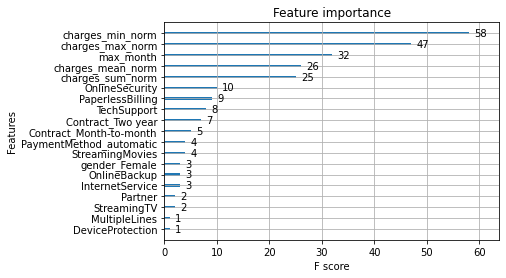

In [328]:
# Plota a importância das variáveis
xgb.plot_importance(xgb_model)
plt.show()

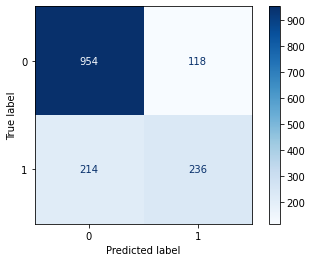

In [330]:
plot_confusion_matrix(xgb_model, X_val, y_val, cmap=plt.cm.Blues, values_format='')

#6 - Avaliação dos modelos

In [331]:
AUC_Arvore  = roc_auc_score(y_test, tree.predict(X_test))
AUC_RegLog  = roc_auc_score(y_test, logreg.predict(X_test))
AUC_XGBoost = roc_auc_score(y_test, xgb_model.predict(X_test))

print("AUC Arvore: {:.3f}".format(AUC_Arvore))
print("AUC RegLog: {:.3f}".format(AUC_RegLog))
print("AUC XGBoost: {:.3f}".format(AUC_XGBoost))

AUC Arvore: 0.680
AUC RegLog: 0.690
AUC XGBoost: 0.705


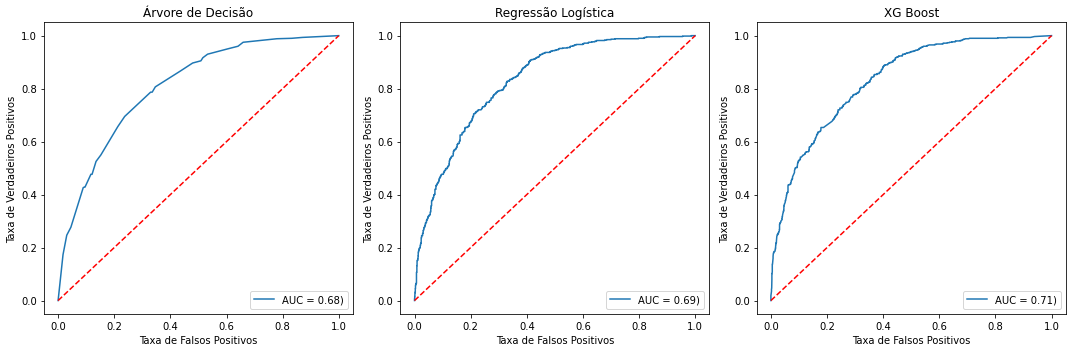

In [332]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

plot_roc_curve(tree, X_test, y_test, ax = axes[0])
axes[0].set_title("Árvore de Decisão")

plot_roc_curve(logreg, X_test, y_test, ax = axes[1])
axes[1].set_title("Regressão Logística")

plot_roc_curve(xgb_model, X_test, y_test, ax = axes[2])
axes[2].set_title("XG Boost")

fig.tight_layout()


In [333]:
print("---------- Árvore de Decisão ----------\n")
print("Acurácia:")
print("- Treino: {:.2f}".format(tree.score(X_train, y_train)))
print("- Validação: {:.2f}".format(tree.score(X_val, y_val)))
print("- Teste: {:.2f}\n".format(tree.score(X_test, y_test)))
print(classification_report(y_test, tree.predict(X_test)))


print("\n---------- Regressão Logística ----------\n")
print("Acurácia:")
print("- Treino: {:.2f}".format(logreg.score(X_train, y_train)))
print("- Validação: {:.2f}".format(logreg.score(X_val, y_val)))
print("- Teste: {:.2f}\n".format(logreg.score(X_test, y_test)))
print(classification_report(y_test, logreg.predict(X_test)))

print("\n---------- XGBoost ----------\n")
print("Acurácia:")
print("- Treino: {:.2f}".format(xgb_model.score(X_train, y_train)))
print("- Validação: {:.2f}".format(xgb_model.score(X_val, y_val)))
print("- Teste: {:.2f}\n".format(xgb_model.score(X_test, y_test)))
print(classification_report(y_test, xgb_model.predict(X_test)))

---------- Árvore de Decisão ----------

Acurácia:
- Treino: 0.79
- Validação: 0.78
- Teste: 0.76

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1429
           1       0.63      0.48      0.54       600

    accuracy                           0.76      2029
   macro avg       0.72      0.68      0.69      2029
weighted avg       0.75      0.76      0.75      2029


---------- Regressão Logística ----------

Acurácia:
- Treino: 0.79
- Validação: 0.78
- Teste: 0.78

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1429
           1       0.68      0.47      0.56       600

    accuracy                           0.78      2029
   macro avg       0.74      0.69      0.70      2029
weighted avg       0.77      0.78      0.76      2029


---------- XGBoost ----------

Acurácia:
- Treino: 0.82
- Validação: 0.78
- Teste: 0.79

              precision    recall  f1-score   support



##Insights

Dos modelos testados, o XGBoost apresentou ligeira vantagem quando comparados aos outros. 

Precisão: Taxa de acerto de tudo o que eu falei que era positivo

Recall: Taxa de acerto de tudo o que era positivo

# Falta fazer

- Em algum momento eu tirei o last_3_months_charge, colocar de volta
- Normalização da coluna mês
- Consertar a parte da  (eventualmente ficou com mais de 8k colunas)
- PCA 
- SVM
- Random Forest